In [1]:
import numpy as np
import scipy as sp
import scipy.linalg
import sympy as sy
sy.init_printing() 

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

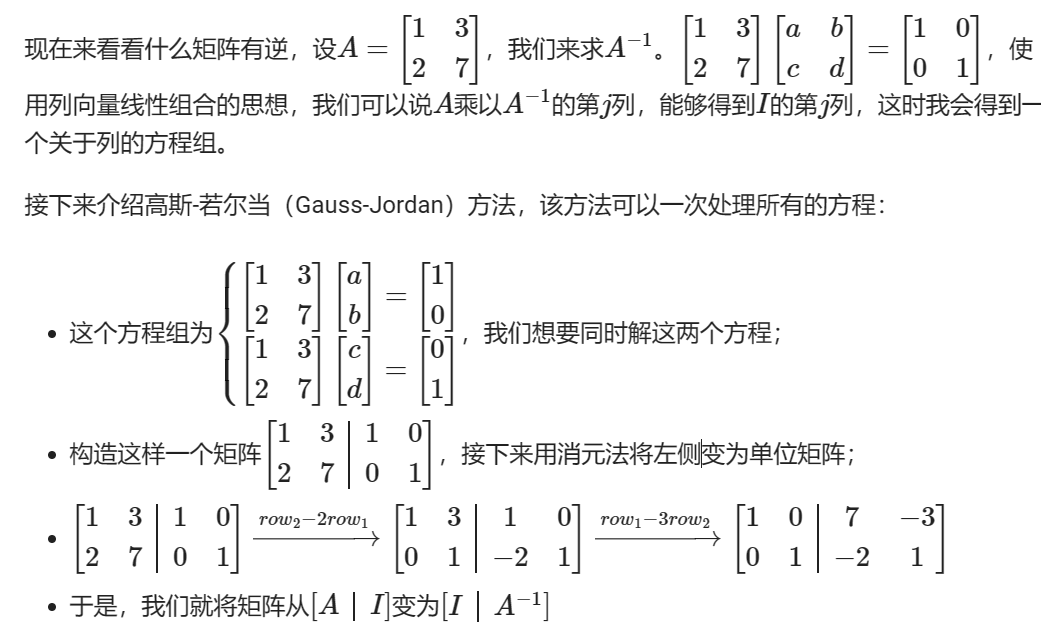

# <font face="gotham" color="purple"> LU Factorization</font>

LU factorization arises due its computational efficiency, it mainly facilitates solving the system of linear equations, though the flops (number of floating operations) of LU is still higher than Guassian-Jordon. Nonetheless LU factorization is particularly handy if you are computing multiple solutions of $A x =b$. 

For instance, if you have a set of $\{b_i,\ i \in \mathbb Z\}$ to substitute in the system, such that
$$
Ax=b_1,\quad Ax=b_2,\quad Ax=b_3,\quad Ax=b_4, \quad...
$$
we only decompose $A$ once, but Guassian-Jordon algorithm will have to re-do operations with every $b_i$.

## <font face="gotham" color="purple"> LU Algorithm</font>

We aim to decompose a matrix $A$ into $L$ and $U$, which represent _lower_ and _upper triangular matrix_ respectively. And $L$ must have $1$'s on its principal diagonal.
$$
A = LU
$$
For instance,
$$
A=\underbrace{\left[\begin{array}{cccc}
1 & 0 & 0 & 0 \\
* & 1 & 0 & 0 \\
* & * & 1 & 0 \\
* & * & * & 1
\end{array}\right]}_{L}\underbrace{\left[\begin{array}{ccccc}
\blacksquare & * & * & * & * \\
0 & \blacksquare & * & * & * \\
0 & 0 & 0 & \blacksquare & * \\
0 & 0 & 0 & 0 & 0
\end{array}\right]}_{U}
$$

_lower_ and _upper triangular matrix_  下三角矩阵

The plausibility of decomposition hinges on if $A$ can be converted into a upper triangular matrix after a series of row operations, i.e. 

$$E_p...E_2E_1  A = U$$

Then 

$$A = (E_p...E_2E_1)^{-1}U = LU$$

where 

$$L = (E_p...E_2E_1)^{-1}$$

We will hand calculate an example here:

$$
A =
\begin{bmatrix}
9 & 3 & 6\\3 & 4 & 6\\0 & 8 & 8\\
\end{bmatrix}
$$

$$
\underbrace{
\begin{bmatrix}
1 & 0 & 0\\-\frac{1}{3} & 1 & 0\\0 & 0 & 1\\
\end{bmatrix}}_{E_1}
\underbrace{
\begin{bmatrix}
9 & 3 & 6\\3 & 4 & 6\\0 & 8 & 8\\ 
\end{bmatrix}}_{A}
=
\underbrace{
\begin{bmatrix}
9 & 3 & 6\\0 & 3 & 4\\0 & 8 & 8\\ 
\end{bmatrix}}_{E_1A}
$$

$$
\underbrace{
\begin{bmatrix}
1 & 0 & 0\\0 &1  & 0\\0 & -\frac{8}{3} & 1\\
\end{bmatrix}}_{E_2}
\underbrace{
\begin{bmatrix}
9 & 3 & 6\\0 & 3 & 4\\0 & 8 & 8\\ 
\end{bmatrix}}_{E_1A}
=
\underbrace{
\begin{bmatrix}
9 & 3 & 6\\0 & 3 & 4\\0 & 0 & -\frac{8}{3}\\ 
\end{bmatrix}}_{E_2E_1A=U}
$$

$$
L^{-1} = E_2E_1 = 
\underbrace{
\begin{bmatrix}
1 & 0 & 0\\0 &1  & 0\\0 & -\frac{8}{3} & 1\\
\end{bmatrix}}_{E_2}
\underbrace{
\begin{bmatrix}
1 & 0 & 0\\-\frac{1}{3} & 1 & 0\\0 & 0 & 1\\
\end{bmatrix}}_{E_1}
=
\begin{bmatrix}
1 & 0 & 0\\-\frac{1}{3} & 1 & 0\\\frac{8}{9} & -\frac{8}{3} & 1\\
\end{bmatrix}
$$

Or we can compute $E_1^{-1}$ and $E_2^{-1}$ directly, because
$$
L = E_1^{-1}E_2^{-1}
$$


Construct augmented matrices for $E_2$ and $E_1$
$$
[E_1| I]=\left[\begin{array}{ccc|ccc}  
1 & 0 & 0 & 1 & 0 & 0\\
-\frac{1}{3} & 1 & 0 & 0  & 1 & 0\\
0 & 0 & 1 & 0 & 0 & 1
\end{array}\right]
\sim
\left[\begin{array}{ccc|ccc}
1 &0 &0 &1 & 0 & 0\\
0& 1& 0& \frac{1}{3} & 1 & 0\\
0 & 0 & 1 &0 & 0 & 1
\end{array}\right]
=[I|E_1^{-1}]
$$

$$
[E_2| I]=
\left[\begin{array}{ccc|ccc}  
1 & 0 & 0 & 1 & 0 & 0\\
0 & 1 & 0 & 0  & 1 & 0\\
0 & -\frac{8}{3} & 1 & 0 & 0 & 1\\
\end{array}
\right]
\sim
\left[\begin{array}{ccc|ccc}  
1 & 0 & 0 & 1 & 0 & 0\\
0 & 1 & 0 & 0  & 1 & 0\\
0 & 0 & 1 & 0 &\frac{8}{3}& 1\\
\end{array}
\right]
=[I|E_2^{-1}]
$$

And we get the inverse of $E_1$ and $E_2$:
$$
E_1^{-1} = \left[\begin{array}{ccc|ccc} 1& 0& 0 \\ \frac{1}{3}& 1& 0\\ 0& 0 &1  \end{array}\right]\\
E_2^{-1} = \left[\begin{array}{ccc|ccc} 1& 0& 0 \\ 1& 1& 0\\ 0& \frac{8}{3} &1  \end{array}\right]
$$

$$
L = E_1^{-1}E_2^{-1}= 
\left[\begin{array}{ccc|ccc} 1& 0& 0 \\ \frac{1}{3}& 1& 0\\ 0& 0 &1  \end{array}\right]
\left[\begin{array}{ccc|ccc} 1& 0& 0 \\ 1& 1& 0\\ 0& \frac{8}{3} &1 \end{array}\right]
=
\left[\begin{array}{ccc|ccc} 1& 0& 0 \\ \frac{4}{3}&1& 0\\ 0& \frac{8}{3} &1 \end{array}\right]
$$

The final result of LU decomposition:
$$
A = LU =
\underbrace{
\left[\begin{array}{ccc|ccc} 1& 0& 0 \\ \frac{4}{3}&1& 0\\ 0& \frac{8}{3} &1 \end{array}\right]}_{L}
\underbrace{
\begin{bmatrix}
9 & 3 & 6\\0 & 3 & 4\\0 & 0 & -\frac{8}{3}\\ 
\end{bmatrix}}_{E_2E_1A=U}
$$

We can take a look at SciPy results.

In [3]:
A = np.array([[9, 3, 6], [3, 4, 6], [0, 8, 8]]); A

array([[9, 3, 6],
       [3, 4, 6],
       [0, 8, 8]])

In [4]:
P, L, U = sp.linalg.lu(A)
P
L
U

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

array([[1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.33333333, 0.375     , 1.        ]])

array([[9., 3., 6.],
       [0., 8., 8.],
       [0., 0., 1.]])

In [5]:
P@L@U # this is A

array([[9., 3., 6.],
       [3., 4., 6.],
       [0., 8., 8.]])

It is easy to notice the SciPy ```lu``` function give us more than $L$ and $U$, but also $P$ which is a **permutation matrix**. Theoretically, we don't need row switches to convert $A$ into $U$, but in some situations we must make row switches beforehand, otherwise decomposition will fail to materialize.

Thus Scipy uses $PLU$ decomposition to make the procedure always possible
$$
A  = PLU
$$

Actually $P = P^{-1}$, why? It's easier to analyze in augmented matrix expression, the inverse of row-switched elementary matrices are themselves.

$$
[P| I]=\left[\begin{array}{ccc|ccc}  
1 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 1 & 0 & 1 & 0\\
0 & 1 & 0 & 0 & 0 & 1
\end{array}\right]
\sim
\left[\begin{array}{ccc|ccc}  
1 & 0 & 0 & 1 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 1\\
0 & 0 & 1 & 0 & 1 & 0
\end{array}\right]=[I| P^{-1}]  =[P^{-1}|I]
$$

With these knowledge, what we are decomposing is actucally

$$
PA = LU
$$

$$
\begin{align}
E_2E_1E_0A &=
\underbrace{
\begin{bmatrix}
1 & 0& 0\\0 & 1 & 0\\0 & -\frac{3}{8} & 1\\
\end{bmatrix}}_{E_2}
\underbrace{
\begin{bmatrix}
1 & 0& 0\\0 & 1 & 0\\-\frac{1}{3} & 0 & 1\\
\end{bmatrix}}_{E_1}
\underbrace{
\begin{bmatrix}
1 & 0& 0\\0 & 0 & 1\\0 & 1 & 0\\
\end{bmatrix}}_{E_0}
\begin{bmatrix}
9 & 3 & 6\\3 & 4 & 6\\0 & 8 & 8\\
\end{bmatrix}\\
E_2E_1E_0A &=
\underbrace{
\begin{bmatrix}
1 & 0& 0\\0 & 1 & 0\\0 & -\frac{3}{8} & 1\\
\end{bmatrix}}_{E_2}
\underbrace{
\begin{bmatrix}
1 & 0& 0\\0 & 1 & 0\\-\frac{1}{3} & 0 & 1\\
\end{bmatrix}}_{E_1}
\underbrace{
\begin{bmatrix}
9& 3& 6\\0&8 &8\\ 3& 4& 6
\end{bmatrix}}_{E_0A}\\
E_2E_1E_0A &=
\underbrace{
\begin{bmatrix}
1 & 0& 0\\0 & 1 & 0\\0 & -\frac{3}{8} & 1\\
\end{bmatrix}}_{E_2}
\underbrace{
\begin{bmatrix}
9 &3 &6\\0 &8& 8 \\0& 3& 4
\end{bmatrix}}_{E_1E_0A}\\
E_2E_1E_0A &=
\underbrace{
\begin{bmatrix}
9 &3 &6\\0 &8& 8 \\0& 0& -1
\end{bmatrix}}_{E_2E_1E_0A}=U
\end{align}
$$
Rearrange that we can see $PL$
$$
A = \underbrace{E_0^{-1}}_{P} \underbrace{(E_1^{-1}E_2^{-1})}_{L}U
$$

# <font face="gotham" color="purple"> Solving Linear System by Using LU Factorization</font>

Solve the linear system：
$$
\begin{align}
3x_1-7x_2 -2x_3+2x_4&=-9\\
-3x_1+5x_2 +x_3 &=5\\
6x_1-4x_2 -5x_4&=7\\
-9x_1+5x_2 -5x_3+12x_4&=11\\
\end{align}
$$
In matrix form:
$$
\underbrace{\left[\begin{array}{rrrr}
3 & -7 & -2 & 2 \\
-3 & 5 & 1 & 0 \\
6 & -4 & 0 & -5 \\
-9 & 5 & -5 & 12
\end{array}\right]}_{A}
\left[\begin{array}{r}
x_1 \\
x_2 \\
x_3 \\
x_4
\end{array}\right]
=
\underbrace{\left[\begin{array}{r}
-9 \\
5 \\
7 \\
11
\end{array}\right]}_{b}
$$
Perform $LU$ decomposition:

$$\underbrace{\left[\begin{array}{rrrr}
3 & -7 & -2 & 2 \\
-3 & 5 & 1 & 0 \\
6 & -4 & 0 & -5 \\
-9 & 5 & -5 & 12
\end{array}\right]}_{A}
=\underbrace{
\left[\begin{array}{rrrr}
1 & 0 & 0 & 0 \\
-1 & 1 & 0 & 0 \\
2 & -5 & 1 & 0 \\
-3 & 8 & 3 & 1
\end{array}\right]}_{L}\underbrace{\left[\begin{array}{rrrr}
3 & -7 & -2 & 2 \\
0 & -2 & -1 & 2 \\
0 & 0 & -1 & 1 \\
0 & 0 & 0 & -1
\end{array}\right]}_{U}$$

Replace $A$ by $LU$, we get $L(Ux) = b$, now solve this pair of equations

$$
Ly = b\\
Ux = y
$$

Construct augmented matrix $[L|b]$

$$
\underbrace{
\left[\begin{array}{rrrr}
1 & 0 & 0 & 0 \\
-1 & 1 & 0 & 0 \\
2 & -5 & 1 & 0 \\
-3 & 8 & 3 & 1
\end{array}\right]}_{L}
\underbrace{\left[\begin{array}{r}
y_1 \\
y_2 \\
y_3 \\
y_4
\end{array}\right]}_{y}
=
\underbrace{\left[\begin{array}{r}
-9 \\
5 \\
7 \\
11
\end{array}\right]}_{b}
$$

$$
\left[\begin{array}{rrrr|r}
1 & 0 & 0 & 0 & -9 \\
-1 & 1 & 0 & 0 & 5\\
2 & -5 & 1 & 0 & 7\\
-3 & 8 & 3 & 1 & 11
\end{array}\right]\sim
\left[\begin{array}{rrrr|r}
1 & 0 & 0 & 0 & -9 \\
0 & 1 & 0 & 0 & -4\\
0 & 0 & 1 & 0 & 5\\
0 & 0 & 0 & 1 & 1
\end{array}\right]
$$

$$
\left[\begin{array}{r}
y_1 \\
y_2 \\
y_3 \\
y_4
\end{array}\right]=
\left[\begin{array}{r}
-9 \\
-4 \\
5 \\
1
\end{array}\right]
$$

Next we solve $Ux = y$, to show this in NumPy:

In [6]:
U = np.array([[3, -7, -2, 2], [0, -2, -1, 2], [0, 0, -1, 1], [0, 0, 0,-1]])
y = np.array([-9, -4, 5, 1])
np.linalg.solve(U, y)

array([ 3.,  4., -6., -1.])

If the process is correct, this is the solution of the system and we can verify results by invoking ```np.linalg.solve()```.

In [7]:
A = np.array([[3, -7, -2, 2], [-3, 5, 1, 0], [6, -4, 0, -5], [-9, 5, -5, 12]])
b = np.array([-9, 5, 7, 11])
np.linalg.solve(A, b)

array([ 3.,  4., -6., -1.])

The results are the same, $LU$ decomposition works!